# Classification of samples: benign or malignant,using decision tree 

### Import Libraries ###

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

### Load Dataset ###

In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


5. Split the Data

In [14]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 
                    'mean area', 'mean concavity', 'mean compactness', 
                    'worst radius']

X = df[selected_features].values
y = df['target'].values

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check shapes again after scaling
print("X_scaled shape:", X_scaled.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X shape: (569, 7)
y shape: (569,)
X_scaled shape: (569, 7)
X_train: (455, 7)
X_test: (114, 7)


In [51]:
# Create and fit the model
classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:


# Predictions
y_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



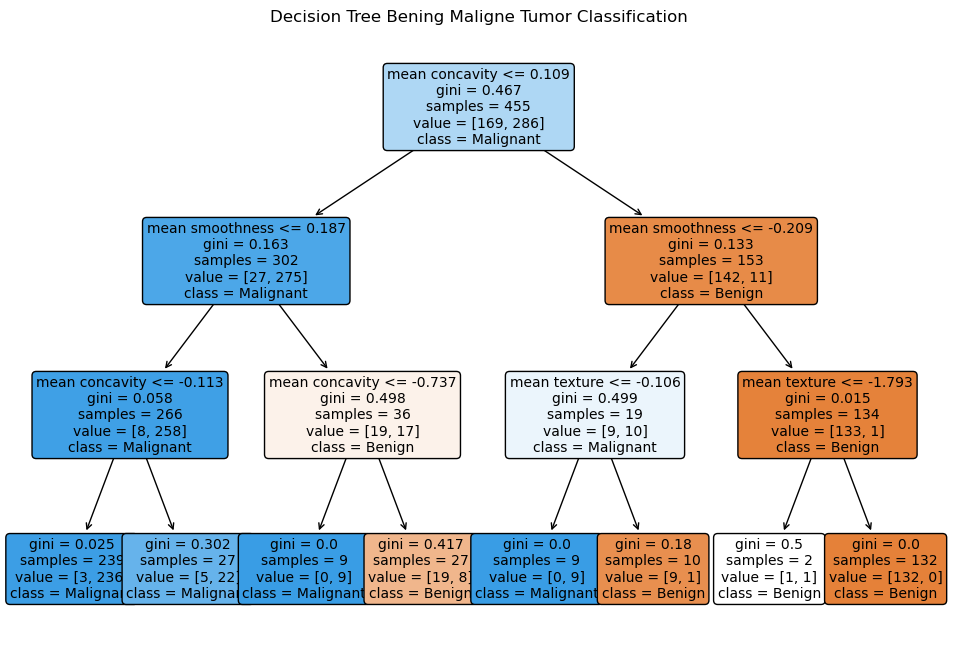

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=data.feature_names, class_names=['Benign', 'Malignant'], rounded=True, fontsize=10 )
plt.title('Decision Tree Bening Maligne Tumor Classification')
plt.show()


The Gini index (or Gini impurity) is a metric used to measure the impurity or disorder of a dataset when creating decision trees. It is one of the criteria that the Decision Tree algorithm uses to decide where to split the data.

### Decision Tree Regression ###

In [25]:
X_reg = df[['mean perimeter']]

In [26]:
y_reg=df['target']

In [27]:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train_reg.shape}, X_test shape: {X_test_reg.shape}')
print(f'y_train shape: {y_train_reg.shape}, y_test shape: {y_test_reg.shape}')

X_train shape: (455, 1), X_test shape: (114, 1)
y_train shape: (455,), y_test shape: (114,)


In [71]:
# Initialize and train the model/ setting maximum decision tree depth to help overfitting
reg = DecisionTreeRegressor(random_state=42, max_depth=3)
reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [48]:
y_pred_reg = reg.predict(X_test_reg)

# Display the predictions
print(y_pred_reg)

[0.92592593 0.         0.21212121 0.92592593 0.92592593 0.
 0.         0.         0.78       0.78       0.92592593 0.05555556
 0.56603774 0.21212121 0.92592593 0.         0.56603774 1.
 1.         0.         0.56603774 0.92592593 0.         1.
 0.92592593 0.78       0.78       1.         0.92592593 0.05555556
 1.         0.92592593 1.         0.78       1.         0.92592593
 0.21212121 0.92592593 0.         0.56603774 1.         0.56603774
 0.92592593 0.92592593 0.92592593 0.92592593 1.         1.
 0.92592593 0.92592593 0.05555556 0.         0.78       0.56603774
 0.92592593 0.92592593 1.         0.         0.78       0.92592593
 0.92592593 0.         0.         0.56603774 0.92592593 0.92592593
 0.21212121 0.         0.92592593 0.92592593 0.56603774 0.21212121
 0.78       0.05555556 1.         0.78       0.78       0.56603774
 1.         0.92592593 0.21212121 1.         0.56603774 0.
 0.         0.21212121 0.92592593 0.         0.92592593 0.92592593
 0.92592593 0.78       0.21212121 1

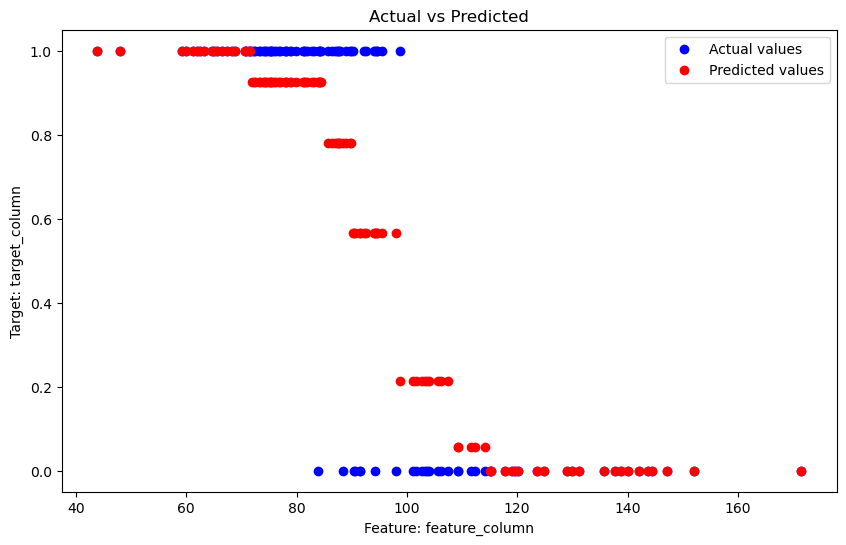

In [42]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg, y_test_reg, color='blue', label='Actual values')
plt.scatter(X_test_reg, y_pred_reg, color='red', label='Predicted values')
plt.title('Actual vs Predicted')
plt.xlabel('Feature: feature_column')
plt.ylabel('Target: target_column')
plt.legend()
plt.show()
#limiting the number of nodes to 3

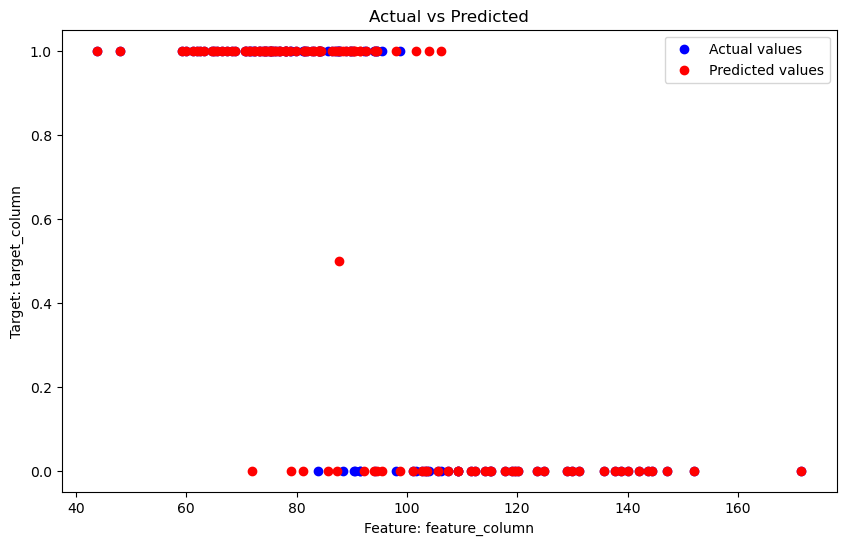

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg, y_test_reg, color='blue', label='Actual values')
plt.scatter(X_test_reg, y_pred_reg, color='red', label='Predicted values')
plt.title('Actual vs Predicted')
plt.xlabel('Feature: feature_column')
plt.ylabel('Target: target_column')
plt.legend()
plt.show()
#All the nodes

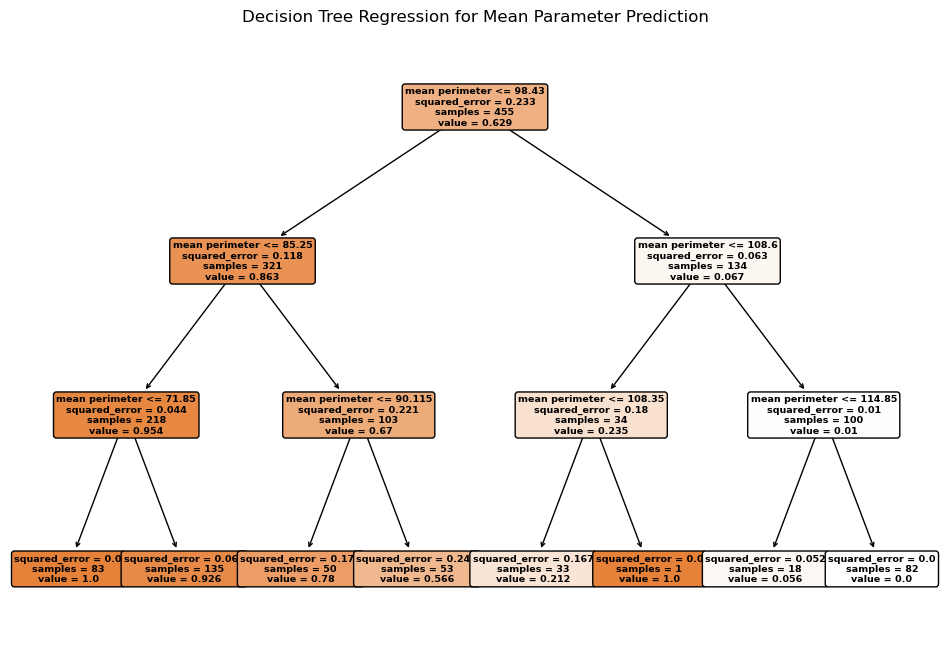

In [64]:
# Set the figure size
plt.figure(figsize=(12, 8))

font_dict = {'weight': 'bold'}

# Plot the decision tree
plot_tree(reg, filled=True, feature_names=X_reg.columns, rounded=True, fontsize=6.9)
# Customize the text to be bold after plotting
for text in plt.gca().texts:
    text.set_fontweight('bold')
# Display the plot
plt.title("Decision Tree Regression for Mean Parameter Prediction")
plt.show()

In [67]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.05790290196558873
R² Score: 0.7535191241582735


### 1. **Mean Squared Error (MSE): 0.0579**
- **Definition**: 
  MSE measures the **average of the squares of the errors**—the difference between the predicted values and the actual (true) values. It indicates how far off the model's predictions are, with larger penalties for bigger errors due to squaring.
  
  - **Formula**:
    $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
    where:
    - \( y_i \): actual value,
    - \( \hat{y_i} \): predicted value,
    - \( n \): number of data points.

- **Interpretation**: 
  - A **lower MSE** means that the model’s predictions are closer to the actual values.
  - In this case, an MSE of **0.0579** is quite small, indicating that the model's predictions are generally close to the actual values.
  
- **Impact on Decision Tree**: 
  - The smaller the MSE, the more accurate the regression model. A low value indicates the decision tree's ability to fit the data effectively. However, a very low MSE could also mean **overfitting**, especially on the training set.

---

### 2. **R² Score (Coefficient of Determination): 0.7535**
- **Definition**: 
  R² score measures the proportion of the **variance in the dependent variable** that is predictable from the independent variables. It shows how well the model fits the data.
  
  - **Formula**:
    $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$
    where:
    - \( y_i \): actual value,
    - \( \hat{y_i} \): predicted value,
    - \( \bar{y} \): mean of actual values.

- **Interpretation**: 
  - An R² score of **0.7535** means that **75.35%** of the variance in the target variable is explained by the model.
  - A score closer to **1** indicates a better fit, while a score closer to **0** suggests a poor fit.

- **Impact on Decision Tree**: 
  - A relatively high R² score, such as **0.7535**, suggests that the decision tree captures the relationship between the features and the target reasonably well. However, it could still be improved.
  - If the model overfits, the R² score on the training set will be much higher than on the test set.


---


In [69]:
# Step 1: Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 2: Predict on training set and test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Step 3: Calculate accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Step 4: Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracy scores
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 1.00
Test Set Accuracy: 0.96


In [70]:
# Step 3: Calculate accuracy using score() method
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

# Output the accuracy scores
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Training Set Accuracy: 1.00
Test Set Accuracy: 0.96


Training Set Accuracy: Indicates how well the model fits the training data.

High accuracy might suggest the model has learned the data, but very high accuracy could also mean overfitting.

Test Set Accuracy: Reflects how well the model generalizes to unseen data. 

This is crucial for assessing the model's real-world performance.

Training Set Accuracy: 1.00: This means the model has perfectly fit the training data. It is predicting all instances correctly on the training set.

Test Set Accuracy: 0.96: While the test accuracy is still quite high (96%), the fact that it’s lower than the training accuracy suggests that the model isn't generalizing as well to unseen data compared to the training data.
A large difference between training and test set accuracy suggests overfitting.

In this case, there is a slight overfitting in this case, but it’s not severe.






### To use Cross validation to Evaluate the Model and Tune Hyperparameters  ###

More Robust Evaluation: Cross-validation gives a better estimate of model performance by training and testing on different subsets of the data.

Hyperparameter Tuning: Grid search helps you find the best hyperparameters (like max_depth, min_samples_split, etc.) to avoid overfitting or underfitting.

Better Generalization: Proper cross-validation and hyperparameter tuning help the model generalize better to unseen data.

In [76]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
# Print the accuracy for each fold and the mean accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.9010989  0.93406593 0.91208791 0.92307692 0.86813187]
Mean cross-validation score: 0.9076923076923077


Perform K-Fold Cross-Validation:
Using cross_val_score to perform K-fold cross-validation (commonly K=5 or K=10). This will train the model on different subsets of the data and calculate the average accuracy.

In [77]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.93406593 0.93406593 0.91208791 0.92307692 0.9010989 ]
Mean cross-validation score: 0.9208791208791209
